In [1]:
## IMPORT LIBRARY ##
import RAKE # !pip install python-rake
import json
from nltk.tokenize import wordpunct_tokenize
import string
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
## FUNCTION LIST ARTICLE ##
def list_article(namefile, record, content):
    # Membaca file json #
    with open(namefile, encoding='utf-8') as myfile:
        data = json.load(myfile)
    
    # Output list artikel #
    dataArticle = []
    
    # Mendapat data artikel dari file json #
    for j in range(len(data[record])):
        # Mendapat isi text dari artikel #
        tempText = data[record][j][content]
        text = ''        
        for i in tempText:
            text = text + i
        # Append text ke list artikel #
        if (text.isspace() == False):
            if (len(text) > 400) :
                dataArticle.append(text)

    return dataArticle

In [3]:
# !pip install python-rake
# !pip install wordcloud

In [4]:
## FUNCTION GET KEYWORD ##
def keyword(list_article, maxWord, top):
    ## Stopword #
    stopwords = "stopwords.txt"
    rake_object = RAKE.Rake(stopwords)
    dataKeyword = []
    dataScore = []

    for contentText in list_article:
        # Mendapat keywords dan score nya  #
        keywords = rake_object.run(contentText, maxWords = maxWord)[:top]
        # Mendapat keywords #
        listKeyword = [lis[0] for lis in keywords]
        # Mendapat score dari keywords #
        listScore = [lis[1] for lis in keywords]
        # Append data keywords dan score #
        dataKeyword.append(listKeyword)
        dataScore.append(listScore)
        
    return dataKeyword, dataScore 

1. TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem.
2. TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.
3. FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.
4. FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem

$ Presisi = \frac{TP}{FP + TP} $

$ Recall = \frac{TP}{FN+TP} $

$ Akurasi = \frac{TP+TN}{TP+TN+FP+FN} $

$ fmeasure = 2x\frac{presisixrecall}{presisi+recall} $

In [5]:
## FUNCTION EVALUATE RAKE #
def evaluate_rake(list_article, list_keyword, top):
    # Inisiasi #
    j=0
    total_precision=0
    total_recall=0
    total_accuracy=0
    # Stopwords #
    rake_obj = RAKE.Rake("stopwords.txt")
    for article in list_article:
        # Mendapat keywords dari top x #
        key = rake_obj.run(article, maxWords=2)[:top]
        # Mendapat panjang list keywords data awal #
        num_manual_keywords = len(list_keyword[j])
        # Inisiasi TP dan TN #
        TP=0
        TN=0
        # Mendapat nilai TP dan TN #
        for i in range(0, min(top,len(key))):
            if key[i][0] in set(list_keyword[j]):
                TP += 1
            if key[i][0] not in set(list_keyword[j]):
                TN += 1
        # Mendapat nilai FP dan FN #
        FP = len(key) - TP
        FN = num_manual_keywords - TP
        # Mendapat nilai presisi, recall, akurasi setiap keywords dari artikel #
        total_precision += TP/float(len(key))
        total_recall += TP/float(num_manual_keywords)
        total_accuracy += (TP + TN) / (float(TP+TN+FP+FN))
        j=j+1
    # Mendapat nilai rata2 presisi, recall, akurasi, dan fmeasure #
    avg_precision = round(total_precision/float(len(list_article)), 2)
    avg_recall = round(total_recall/float(len(list_article)), 2)
    avg_fmeasure = round(2*avg_precision*avg_recall/(avg_precision + avg_recall), 2)
    avg_accuracy = round(total_accuracy/float(len(list_article)), 2)

    return (print("Precision", avg_precision, "Recall", avg_recall, "F-Measure", avg_fmeasure, "accuracy", avg_accuracy))

In [6]:
# Data artikel #
dataArticle = list_article('articles.json', 'RECORDS', 'contentRaw')

In [7]:
dataArticle[1]

'\r\n\r\n                     - Ivan Valentino, terdakwa kasus pencekikan petugas Kelompok Penyelenggara Pemungutan Suara () dituntut tiga bulan penjara dan denda sebesar Rp 5.000.000 subsidair dua bulan kurungan. Ivan diyakini Jaksa bersalah melakukan tindak pidana pemilu sebagaimana diatur dalam UU Pemilu."Jaksa Penuntut Umum Fedrik Adhar, SH dan Doni Boy Faisal Panjaitan, SH menyatakan terdakwa Ivan Valentino terbukti secara sah dan meyakinkan bersalah, yakni melakukan tindak pidana pemilu sebagaimana diatur dalam Pasal 531 UU No 7 Tahun 2017 tentang Pemilihan Umum. Terdakwa dengan sengaja menggunakan tindak kekerasan melakukan kegiatan yang menimbulkan gangguan ketertiban dan ketentraman pelaksanaan pemungutan suara," kata Ketua Sentra Gakkumdu Bawaslu Jakut, Benny Sabdo dalam keterangan tertulis, Rabu (12/6/2019). Tuntutan itu disampaikan hari ini di Pengadilan Jakarta Utara. Atas tuntutan itu, Tim Sentra Gakkumdu Bawaslu Jakarta Utara berharap efek jera dapat diberikan. Dia pun b

In [8]:
# Data keywords dan score #
dataKeyword, dataScore = keyword(dataArticle, 2, 15)

In [9]:
# Evaluasi rake #
evaluate_rake(dataArticle, dataKeyword, 10)

Precision 1.0 Recall 0.67 F-Measure 0.8 accuracy 0.67


In [10]:
dataKeyword[1]

['ivan valentino',
 'uu pemilu',
 'jaksa penuntut',
 'fedrik adhar',
 'keterangan tertulis',
 'penyelenggara pemilu',
 'efek jera',
 'personil kpu',
 'mengawasi perkara',
 'ivan ditetapkan',
 'jakarta utara',
 'pemungutan suara',
 'karang bolong',
 'menyerang salah',
 'anggota kpps']

In [11]:
df = pd.DataFrame({'article': dataArticle, 'keyword': dataKeyword, 'score': dataScore})
df

,article,keyword,score
0,\r\n\r\n - RI menyelesaik...,"[kantor kpu, jakarta pusat, rapat dihadiri, ru...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, ..."
1,"\r\n\r\n - Ivan Valentino,...","[ivan valentino, uu pemilu, jaksa penuntut, fe...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
2,\r\n\r\n - Nama Tim Mawar ...,"[tokoh militer, hasil penyidikan, merancukan s...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
3,\r\n\r\n - Dua mantan jurn...,"[kawan-kawan media, kawan-kawan, mantan jurnal...","[8.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
4,\r\n\r\n - Tim Kampanye Da...,"[mendeklarasikan dukungannya, alam demokrasi, ...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.66666666..."
...,...,...,...
3756,\r\n\r\n - Wasekjen PKB Da...,"[jokowi-kiai ma, calon pemilih, mengeluarkan i...","[9.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
3757,\r\n\r\n - BMKG mencabut p...,"[lokasi terdampak, dinyatakan aman, kantor bmk...","[4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.3333333333333..."
3758,\r\n\r\n - hadir di pidato...,"[kehadiran tokoh-tokoh, jawa timur, sang capre...","[7.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ..."
3759,\r\n\r\n - Seorang bocah S...,"[belitung timur, bangka belitung, tim gabungan...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.625, 3.625, 3..."


In [12]:
## FUNCTION DISPLAY WORD CLOUD ##
# display 1 artikel #
def display_spesific(text, i):
    strT = ""
    for contentText in text[i]:
        strT = strT + contentText + ", "
    
    wordcloud = WordCloud().generate(strT)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()  

# display semua artikel #
def display_general(text):
    strT = ""
    for i in range(len(text)):
        for j in range(len(text[i])):
            strT = strT  + text[i][j] + ", "
    
    wordcloud = WordCloud().generate(strT)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()  

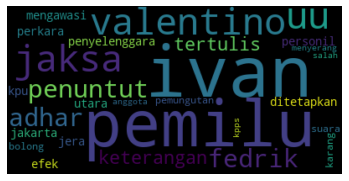

In [13]:
display_spesific(dataKeyword, 1)

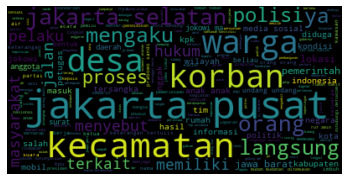

In [14]:
display_general(df['keyword'])